In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# 创建示例数据集
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Age': [25, 34, 45, 23, 35, 45, 23, 54, 32, 45, 23, 45, 65, 34, 45],
    'Annual Income (k$)': [15, 20, 35, 60, 45, 70, 35, 80, 34, 90, 19, 34, 67, 23, 45],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 6, 76, 3, 72, 3, 99, 77, 10, 88, 77]
}
df = pd.DataFrame(data)
 
# 标准化特征
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

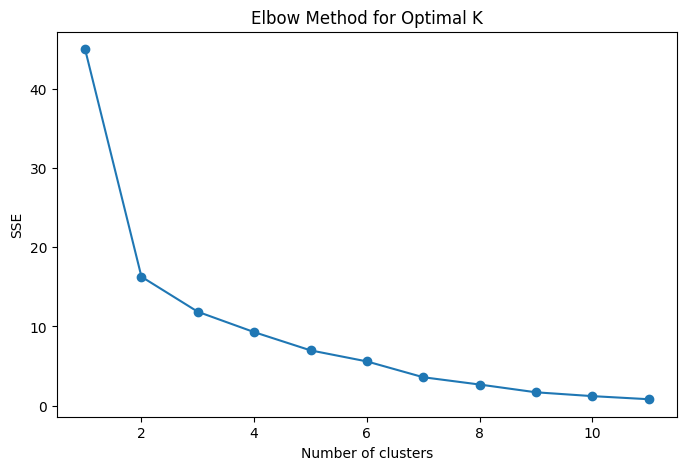

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# 计算不同K值下的SSE
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)
 
# 绘制肘部法则图
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [24]:
#选择K值为3
# 运行K-means聚类
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
# 查看聚类结果
print(df)

    CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0            1 -1.102453           -1.314388               -0.322891        2
1            2 -0.350780           -1.093853                0.880785        2
2            3  0.567930           -0.432248               -1.268636        0
3            4 -1.269491            0.670426                0.766149        2
4            5 -0.267261            0.008821               -0.294232        0
5            6  0.567930            1.111496               -1.268636        1
6            7 -1.269491           -0.432248                0.737490        2
7            8  1.319602            1.552565               -1.354613        1
8            9 -0.517819           -0.476355                0.622855        2
9           10  0.567930            1.993635               -1.354613        1
10          11 -1.269491           -1.137960                1.396646        2
11          12  0.567930           -0.476355                0.76

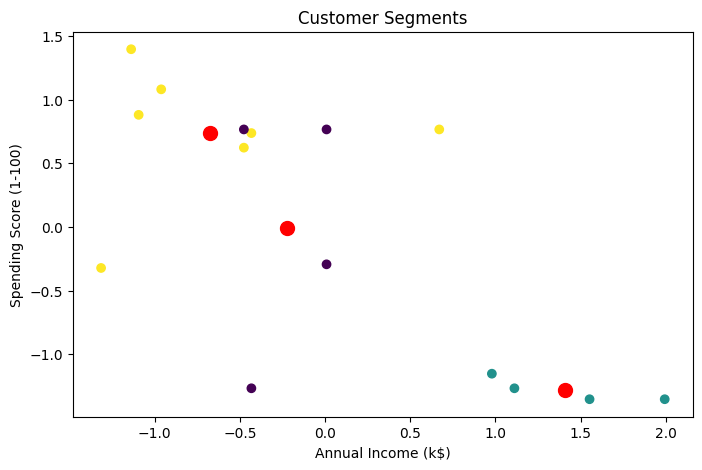

In [25]:
# 可视化聚类结果
plt.figure(figsize=(8, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [26]:
# 查看每个簇的中心
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)
 
# 查看每个簇的样本数量
print(df['Cluster'].value_counts())

Cluster Centers:
 [[ 0.35913229 -0.22274017 -0.00764239]
 [ 1.17344389  1.40921753 -1.28296592]
 [-0.87575782 -0.67798706  0.73749046]]
Cluster
2    7
0    4
1    4
Name: count, dtype: int64
